# **EJERCICIO 1**

### Explica qué pedidos de Linux Puedes utilizar a la hora de analizar logs escritos en archivo para:

- Ver continuamente los logs que se van escribiendo en un archivo:

    - **tail -f <archivo.log>:** Este comando muestra las últimas líneas de un archivo de log y sigue mostrando nuevas entradas en tiempo real.

- Buscar una palabra concreta dentro de un archivo de log:

    - **grep "error" <archivo.log>:** Este comando busca la palabra especificada en el archivo de log y muestra las líneas que la contienen. Si deseas que la búsqueda sea insensible a mayúsculas, puedes agregar el parámetro **-i**, es decir, **grep -i "error" <archivo.log>**.

# **EJERCICIO 2**

El concepto logging es muy importante en la programación, al tiempo que está estrictamente relacionado con el tema que estamos trabajando. Un log en nuestro ámbito vendría a ser un fichero que contiene datos relacionados con los principales eventos y sucesos que ocurren en un programa o sistema operativo, así pues, ya sea para saber en qué punto hemos tenido un error, porque el ejecución del programa no ha ido bien, o qué serie de pasos ha seguido una persona mientras utilizaba nuestra aplicación y otras muchas utilidades, los Logs son vitales en el mundo del software. 

### 1- En este ejercicio recuperaremos el bucle de ejemplo que utilizamos en las sesiones de teoría, y configuraremos el log para que los mensajes de error (isuperiores) vayan a un archivo, y los mensajes de info (y superiores) vayan a otro archivo, mientras que todos los mensajes se muestran a la vez por pantalla. Además, añadiremos un nuevo mensaje de info a la aplicación por lo que utilizaremos un logger especial y diferente al que ya hemos utilizado, y que tendrá un manegador con formato csv.  Haz commit al repositorio cada vez que tengas resuelto y funcionando una de estas cosas:

- logs de info a archivo de logs de info y logs de error a archivo de logs de error
  
- Añadir, además del handler de archivo para archivos info, un handler de pantalla con nivel info

- Añadir un nuevo logger con un nuevo manegador y un nuevo formateador a CSV, y añadir una línea al programa que genere estos logs

- Subir al repositorio una muestra de unas 20 líneas de los archivos de logs generados por su aplicación: uno de info, uno de error, y uno en formato CSV


In [1]:
import logging
import os
import csv

# Crear una carpeta 'logs' si no existe
if not os.path.exists('logs'):
    os.makedirs('logs')

# Crear el logger principal
logger = logging.getLogger('app_logger')
logger.setLevel(logging.DEBUG)

# Handler para logs de info
info_handler = logging.FileHandler('logs/info_log.log')
info_handler.setLevel(logging.INFO)
info_formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
info_handler.setFormatter(info_formatter)

# Handler para logs de error
error_handler = logging.FileHandler('logs/error_log.log')
error_handler.setLevel(logging.ERROR)
error_formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
error_handler.setFormatter(error_formatter)

# Handler para mostrar logs en pantalla
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)
console_handler.setFormatter(info_formatter)

# Agregar handlers al logger
logger.addHandler(info_handler)
logger.addHandler(error_handler)
logger.addHandler(console_handler)

# Crear un logger CSV
csv_logger = logging.getLogger('csv_logger')
csv_logger.setLevel(logging.DEBUG)

# Crear un handler para escribir logs en formato CSV
csv_file_handler = logging.FileHandler('logs/csv_log.csv')
csv_file_handler.setLevel(logging.INFO)

# Crear un formatter para el CSV
csv_formatter = logging.Formatter('%(asctime)s,%(levelname)s,%(message)s')
csv_file_handler.setFormatter(csv_formatter)

# Agregar el handler CSV al logger
csv_logger.addHandler(csv_file_handler)

# Generar múltiples logs
for i in range(1, 21):
    logger.info(f'Este es un mensaje de info número {i}')
    if i % 2 == 0:
        logger.error(f'Este es un mensaje de error número {i}')
    csv_logger.info(f'CSV log mensaje {i}')
    logger.info(f'Este mensaje se muestra por pantalla: número {i}')

# Función para mostrar las primeras 20 líneas de un archivo de log
def mostrar_primers_logs(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        return lines[:20]

# Mostrar los primeros 20 logs de cada archivo
info_logs = mostrar_primers_logs('logs/info_log.log')
error_logs = mostrar_primers_logs('logs/error_log.log')
csv_logs = mostrar_primers_logs('logs/csv_log.csv')

print("Logs de info:")
print(info_logs)

print("Logs de error:")
print(error_logs)

print("Logs CSV:")
print(csv_logs)

2024-12-01 16:51:30,404 - INFO - Este es un mensaje de info número 1
2024-12-01 16:51:30,431 - INFO - Este mensaje se muestra por pantalla: número 1
2024-12-01 16:51:30,432 - INFO - Este es un mensaje de info número 2
2024-12-01 16:51:30,433 - ERROR - Este es un mensaje de error número 2
2024-12-01 16:51:30,434 - INFO - Este mensaje se muestra por pantalla: número 2
2024-12-01 16:51:30,435 - INFO - Este es un mensaje de info número 3
2024-12-01 16:51:30,436 - INFO - Este mensaje se muestra por pantalla: número 3
2024-12-01 16:51:30,436 - INFO - Este es un mensaje de info número 4
2024-12-01 16:51:30,437 - ERROR - Este es un mensaje de error número 4
2024-12-01 16:51:30,438 - INFO - Este mensaje se muestra por pantalla: número 4
2024-12-01 16:51:30,438 - INFO - Este es un mensaje de info número 5
2024-12-01 16:51:30,439 - INFO - Este mensaje se muestra por pantalla: número 5
2024-12-01 16:51:30,439 - INFO - Este es un mensaje de info número 6
2024-12-01 16:51:30,440 - ERROR - Este es un

Logs de info:
['2024-11-29 19:11:02,915 - INFO - Este es un mensaje de info número 1\n', '2024-11-29 19:11:02,916 - INFO - Este mensaje se muestra por pantalla: número 1\n', '2024-11-29 19:11:02,917 - INFO - Este es un mensaje de info número 2\n', '2024-11-29 19:11:02,918 - ERROR - Este es un mensaje de error número 2\n', '2024-11-29 19:11:02,920 - INFO - Este mensaje se muestra por pantalla: número 2\n', '2024-11-29 19:11:02,920 - INFO - Este es un mensaje de info número 3\n', '2024-11-29 19:11:02,921 - INFO - Este mensaje se muestra por pantalla: número 3\n', '2024-11-29 19:11:02,922 - INFO - Este es un mensaje de info número 4\n', '2024-11-29 19:11:02,923 - ERROR - Este es un mensaje de error número 4\n', '2024-11-29 19:11:02,923 - INFO - Este mensaje se muestra por pantalla: número 4\n', '2024-11-29 19:11:02,924 - INFO - Este es un mensaje de info número 5\n', '2024-11-29 19:11:02,925 - INFO - Este mensaje se muestra por pantalla: número 5\n', '2024-11-29 19:11:02,925 - INFO - Este

### 2- ¿Crees que es mejor mostrar los logs por ejemplo en la terminal durante la ejecución del programa o volcarlos en un archivo de texto?

La decisión de mostrar los logs en la terminal o volcarlos en un archivo depende del contexto:

- **Mostrar en la terminal:** Es útil para desarrolladores o durante la depuración en tiempo real. Permite ver rápidamente qué está ocurriendo mientras el programa se ejecuta, pero puede volverse desordenado en programas largos.

- **Guardar en un archivo:** Es recomendable para registros persistentes. Permite almacenar un historial de eventos que se pueden revisar más tarde, hacer análisis o auditorías. Es esencial para aplicaciones en producción.

En general, ambas opciones pueden complementarse, mostrando los logs en la terminal durante el desarrollo y guardándolos en un archivo para análisis posterior.

### 3- Rellena la siguiente tabla con ejemplo, ventajas, y desventajas de las siguientes formas de hacer logs


| **Método de logging**                                            | **Ejemplo**                                                                                                    | **Ventajas**                                                                                                   | **Desventajas**                                                                                              |
|------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|
| **Usando la configuración por defecto del módulo logging**      | `import logging` <br> `logging.basicConfig(level=logging.INFO)` <br> `logging.info("Mensaje de información")`    | - Configuración sencilla y rápida. <br> - No requiere mucho código.                                          | - Menos flexibilidad. <br> - No permite personalizar fácilmente los formatos ni los archivos de salida.      |
| **Instanciando un objeto logger y parametrizándolo desde el programa** | `logger = logging.getLogger('my_logger')` <br> `logger.setLevel(logging.DEBUG)` <br> `logger.info("Mensaje")`    | - Más flexibilidad para configurar múltiples loggers con diferentes niveles. <br> - Se pueden agregar más manejadores. | - Más código para configurar. <br> - Puede resultar más complejo en programas pequeños.                     |
| **Instanciando un objeto logger a partir de una configuración almacenada en un archivo** | `logging.config.fileConfig('logging.conf')` <br> `logger = logging.getLogger('my_logger')`                        | - Facilita la configuración centralizada. <br> - Cambios en la configuración sin modificar el código.         | - Requiere mantener archivos de configuración externos. <br> - Puede ser más difícil de depurar si el archivo está mal configurado. |


### 4- Busca librerías de logs en otros lenguajes (al menos 2, e identifica cómo resuelven las siguientes características típicas de un sistema de logging. Rellena la siguiente tabla

| **Lenguaje**                     | **Lenguaje 1 (C#)**    | **Lenguaje 2 (Go)**   | **Otro (opcional) (Python)** |
|-----------------------------------|------------------------|-----------------------|-----------------------------|
| **Nombre de la librería**         | Log4net                | Slog                  | Logging (Python)            |
| **¿Es nativa del lenguaje?**      | No                     | Sí (para Go 1.21 o superior) | Sí                         |
| **URL para descargar la librería** | [Log4net](https://logging.apache.org/log4net/) | [Slog en Golang](https://pkg.go.dev/golang.org/x/exp/slog) | [Logging Python](https://docs.python.org/3/library/logging.html) |
| **Inicialización del objeto logger** | `private static readonly ILog log = LogManager.GetLogger(typeof(Program));` | `logger := slog.New(slog.NewTextHandler(os.Stdout))` | `import logging; logger = logging.getLogger('example')` |
| **Niveles de log disponibles**    | TRACE, DEBUG, INFO, WARN, ERROR, FATAL | DEBUG, INFO, WARN, ERROR | DEBUG, INFO, WARNING, ERROR, CRITICAL |
| **Método para hacer log**         | `log.Info("This is an info message");` | `logger.Info("This is an info message")` | `logger.info('This is an info message')` |
| **Tipos de manejadores (pantalla, archivo…) Identificar los nombres en la API** | Consola (ConsoleAppender), Archivo (FileAppender), Base de datos (AdoNetAppender), RollingFileAppender | Consola (NewTextHandler), JSON (NewJSONHandler) | Consola (StreamHandler), Archivo (FileHandler), Rotación de archivos (RotatingFileHandler) |
| **Opciones de formato**           | Configurable mediante XML, incluye fecha, nivel, clase | Formato texto (Logfmt), JSON, personalización de campos (ej. `slog.Int("version", 1)`) | Configurable mediante `Formatter`, incluye fecha, nivel, mensaje, etc. |

# **EJERCICIO 3**

Mediante las herramientas propuestas a continuación, quisiéramos elaborar una pequeña aplicación que permitiera a un trabajador de forma sencilla introducir mediante un archivo json, txt csv o similar introducir unos datos que escogemos y le elaboramos una serie de gráficas.

Antes de esto, habrá que informarse sobre las siguientes herramientas, alguna de las cuales quizás ya conozca.

- Pandas
- Jupyter Notebook
- reportlab

### La idea de este punto es detallar

- La funcionalidad de cada una de las herramientas presentadas

- Habrá que poner capturas de las pruebas que ha hecho y argumentar qué herramientas y librerías utilizará finalmente.

### 1. Herramienta: Pandas

**Funcionalidad:** Pandas es una librería de Python muy potente y flexible para la manipulación y análisis de datos. Permite trabajar con datos en estructuras como DataFrames (tablas) y Series (columnas), lo que facilita tareas como:

- Lectura de archivos CSV, Excel, JSON, TXT, entre otros.
- Manipulación de datos: selección, filtrado, agregación, ordenación, limpieza de datos, etc.
- Realización de operaciones matemáticas sobre los datos y generación de estadísticas descriptivas.
- Se integra fácilmente con otras librerías de visualización (como matplotlib y seaborn).

**Ejemplo de uso:** Pandas se utilizaría para cargar los datos de los archivos que el trabajador introduzca y manipular esos datos para la generación de las gráficas. Por ejemplo, un trabajador podría cargar un archivo CSV con datos de ventas y luego usar Pandas para calcular el promedio de ventas por mes.

**Prueba con Pandas**

Código para cargar un archivo CSV y realizar un análisis básico:

In [2]:
# --- Creación del archivo CSV ---
import pandas as pd

# Crear datos de ejemplo
data = {
    "Categoría": ["A", "B", "C", "D", "E"],
    "Ventas": [100, 200, 150, 300, 250],
    "Ganancias": [50, 80, 60, 120, 100]
}

# Convertir los datos a un DataFrame y guardarlos en un archivo CSV
df = pd.DataFrame(data)
df.to_csv("datos.csv", index=False)

print("Archivo 'datos.csv' creado con éxito.")

# --- Prueba con Pandas ---
# Cargar datos desde el archivo CSV
df = pd.read_csv("datos.csv")

# Mostrar las primeras filas del DataFrame
print("Primeras filas del archivo:")
print(df.head())

Archivo 'datos.csv' creado con éxito.
Primeras filas del archivo:
  Categoría  Ventas  Ganancias
0         A     100         50
1         B     200         80
2         C     150         60
3         D     300        120
4         E     250        100


### 2. Herramienta: Jupyter Notebook

**Funcionalidad:** Jupyter Notebook es una herramienta de desarrollo interactivo que permite escribir y ejecutar código de manera interactiva, lo que es perfecto para la experimentación y el análisis de datos. Permite combinar:

- Código Python (o en otros lenguajes) con texto descriptivo utilizando Markdown.
- Gráficas generadas en tiempo real.
- Es muy utilizado en el análisis de datos, ya que permite ver los resultados de inmediato y tener todo bien documentado.

**Ejemplo de uso:** Se usaría Jupyter Notebook para crear un entorno interactivo donde el trabajador pueda cargar datos, ver las gráficas generadas y realizar análisis de manera dinámica. Los notebooks también permiten integrar gráficos generados con Pandas y otras librerías de visualización.

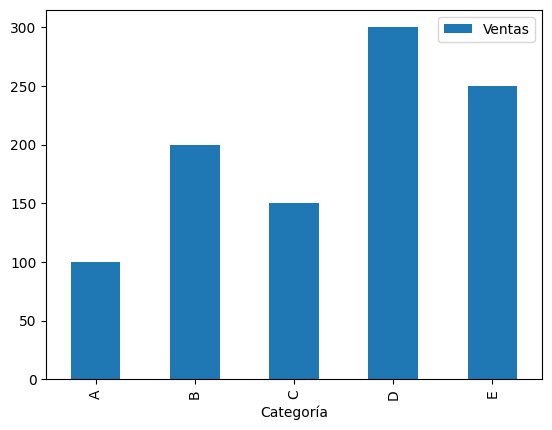

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('datos.csv')

# Generar una gráfica
df.plot(x='Categoría', y='Ventas', kind='bar')
plt.show()

### 3. Herramienta: ReportLab

**Funcionalidad:** ReportLab es una librería de Python diseñada para la generación de documentos PDF. Es especialmente útil si necesitas crear reportes o informes a partir de los datos analizados y las gráficas generadas.

**Características clave:**

- Creación de documentos PDF personalizados con texto, gráficos, tablas e imágenes.
- Integración con librerías como Matplotlib para incluir gráficos generados en el análisis de datos dentro del PDF.
- Personalización avanzada de los documentos (fuentes, colores, márgenes, etc.).
  
**Ejemplo de uso:** ReportLab se utilizaría si el trabajador necesita generar un informe en formato PDF con los resultados del análisis y las gráficas generadas en el proceso. Por ejemplo, si el trabajador crea un reporte mensual con los resultados de ventas y genera gráficas de rendimiento, estos pueden ser exportados a un PDF con ReportLab.

In [4]:
!pip install reportlab


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [5]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Crear un archivo PDF
c = canvas.Canvas("reporte.pdf", pagesize=letter)

# Escribir texto en el PDF
c.drawString(100, 750, "Reporte de Ventas")

# Guardar el archivo
c.save()

# **EJERCICIO 4**

### En aquest exercici caldrà generar per exemple un CSV amb les dades que treballareu. RECORDAR que el CSV treballa amb comes. 

### Un cop generat el CSV, caldrà bolcar les dades al JUPYTER i comprovar que es mostren correctament.

Ej.

|   Profesor  |      Alumno      |   M01   |   M04   |   M03   |   M05   |
|  :--------: |  :-----------:   |  :---:  |  :---:  |  :---:  |  :---:  |
|    Emili    |      Xavier      |    7    |    9    |    5    |    8   |
|    Mario  |     Marc       |    10   |    3    |    5    |    8    |  
|    Steven |      Jaume |    8    |    5   |    6   |    4    |  

**Como restricciones será necesario que el archivo contenga un mínimo de veinte personas y cada uno tenga 5 columnas con datos.**

In [6]:
import pandas as pd

# Crear datos de ejemplo para el CSV con un mínimo de 20 personas
data = {
    "Profesor": ["Emili", "Mario", "Steven", "Isabel", "Jose", "Anna", "Laura", "Carlos", "Marta", "Luis",
                 "Patricia", "Jorge", "Elena", "Andrés", "Sara", "David", "Lucía", "Miguel", "Carmen", "Pablo"],
    "Alumno": ["Xavier", "Marc", "Jaume", "Clara", "Antonio", "Irene", "Dani", "Paula", "Raúl", "Nuria",
               "Victor", "Sonia", "Adrián", "María", "Óscar", "Julia", "Javier", "Alicia", "Hugo", "Ana"],
    "M01": [7, 10, 8, 6, 7, 9, 8, 7, 10, 6, 8, 7, 9, 6, 10, 7, 8, 9, 7, 6],
    "M04": [9, 3, 5, 8, 7, 9, 6, 8, 5, 7, 6, 8, 9, 5, 8, 6, 7, 5, 9, 8],
    "M03": [5, 5, 6, 7, 8, 5, 9, 6, 7, 8, 5, 6, 9, 8, 7, 5, 6, 8, 9, 7],
    "M05": [8, 8, 4, 7, 5, 9, 6, 8, 7, 5, 9, 6, 8, 7, 5, 6, 8, 7, 9, 6]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Guardar el DataFrame en un archivo CSV
file_path = "notas_profesores_alumnos.csv"
df.to_csv(file_path, index=False)

# Cargar el archivo CSV para mostrarlo
df_cargado = pd.read_csv(file_path)

# Mostrar el contenido del CSV cargado
print("Contenido del archivo CSV cargado:")
print(df_cargado)


Contenido del archivo CSV cargado:
    Profesor   Alumno  M01  M04  M03  M05
0      Emili   Xavier    7    9    5    8
1      Mario     Marc   10    3    5    8
2     Steven    Jaume    8    5    6    4
3     Isabel    Clara    6    8    7    7
4       Jose  Antonio    7    7    8    5
5       Anna    Irene    9    9    5    9
6      Laura     Dani    8    6    9    6
7     Carlos    Paula    7    8    6    8
8      Marta     Raúl   10    5    7    7
9       Luis    Nuria    6    7    8    5
10  Patricia   Victor    8    6    5    9
11     Jorge    Sonia    7    8    6    6
12     Elena   Adrián    9    9    9    8
13    Andrés    María    6    5    8    7
14      Sara    Óscar   10    8    7    5
15     David    Julia    7    6    5    6
16     Lucía   Javier    8    7    6    8
17    Miguel   Alicia    9    5    8    7
18    Carmen     Hugo    7    9    9    9
19     Pablo      Ana    6    8    7    6


# **EJERCICIO 5**

### Una vez tratados los datos introducidos vía fichero habrá que investigar la librería que haya elegido y elaborar como mínimo el código necesario para presentar de forma que tengan sentido con el ámbito del problema una serie de datos transformados obtenidos correspondientes a, (se deberá adecuar a sus datos pero para que tenga algún ejemplo).

**Ej.**

- La media de nota final de cada alumno
- La media de nota final de todos los alumnos en conjunto.
- Porcentajes de aprobados y suspendidos
- Notas más bajas o más altas.
- Alguno otro que cree interesante.

Como restricción será necesario al menos generar cinco resultados coherentes con un proceso de evaluación.

In [7]:
import pandas as pd

# Cargar los datos desde el archivo CSV generado previamente
file_path = "notas_profesores_alumnos.csv"
df = pd.read_csv(file_path)

# 1. Calcular la media de nota final de cada alumno
df['Nota_Final'] = df[["M01", "M04", "M03", "M05"]].mean(axis=1)
print("1. Media de nota final de cada alumno:")
print(df[["Alumno", "Nota_Final"]])

# 2. Calcular la media de nota final de todos los alumnos en conjunto
media_general = df['Nota_Final'].mean()
print("\n2. Media de nota final de todos los alumnos en conjunto:")
print(media_general)

# 3. Calcular el porcentaje de aprobados y suspensos
aprobados = df[df['Nota_Final'] >= 5].shape[0]
suspensos = df[df['Nota_Final'] < 5].shape[0]
total_alumnos = df.shape[0]
porcentaje_aprobados = (aprobados / total_alumnos) * 100
porcentaje_suspensos = (suspensos / total_alumnos) * 100
print("\n3. Porcentaje de aprobados y suspensos:")
print(f"Aprobados: {porcentaje_aprobados:.2f}%")
print(f"Suspensos: {porcentaje_suspensos:.2f}%")

# 4. Mostrar las notas más bajas y más altas en cada módulo
notas_mas_altas = df[["M01", "M04", "M03", "M05"]].max()
notas_mas_bajas = df[["M01", "M04", "M03", "M05"]].min()
print("\n4. Notas más altas y más bajas en cada módulo:")
print(f"Notas más altas:\n{notas_mas_altas}")
print(f"Notas más bajas:\n{notas_mas_bajas}")

# 5. Alumnos con las mejores y peores notas finales
alumno_mejor_nota = df.loc[df['Nota_Final'].idxmax()]
alumno_peor_nota = df.loc[df['Nota_Final'].idxmin()]
print("\n5. Alumnos con las mejores y peores notas finales:")
print(f"Mejor nota final:\n{alumno_mejor_nota[['Alumno', 'Nota_Final']]}")
print(f"Peor nota final:\n{alumno_peor_nota[['Alumno', 'Nota_Final']]}")

# Opcional: Guardar los resultados en un nuevo archivo CSV
resultados_path = "resultados_evaluacion.csv"
df[["Alumno", "Nota_Final"]].to_csv(resultados_path, index=False)
print(f"\nResultados guardados en {resultados_path}")

1. Media de nota final de cada alumno:
     Alumno  Nota_Final
0    Xavier        7.25
1      Marc        6.50
2     Jaume        5.75
3     Clara        7.00
4   Antonio        6.75
5     Irene        8.00
6      Dani        7.25
7     Paula        7.25
8      Raúl        7.25
9     Nuria        6.50
10   Victor        7.00
11    Sonia        6.75
12   Adrián        8.75
13    María        6.50
14    Óscar        7.50
15    Julia        6.00
16   Javier        7.25
17   Alicia        7.25
18     Hugo        8.50
19      Ana        6.75

2. Media de nota final de todos los alumnos en conjunto:
7.0875

3. Porcentaje de aprobados y suspensos:
Aprobados: 100.00%
Suspensos: 0.00%

4. Notas más altas y más bajas en cada módulo:
Notas más altas:
M01    10
M04     9
M03     9
M05     9
dtype: int64
Notas más bajas:
M01    6
M04    3
M03    5
M05    4
dtype: int64

5. Alumnos con las mejores y peores notas finales:
Mejor nota final:
Alumno        Adrián
Nota_Final      8.75
Name: 12, dtype: ob

# **EJERCICIO 6**

**Como restricción será necesario al menos generar cinco resultados coherentes con un proceso de evaluación.**

Es pot utilitzar la llibreria python **matploit**

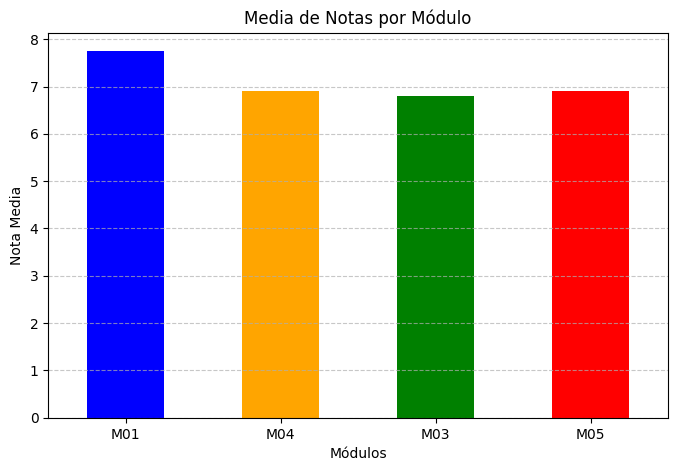

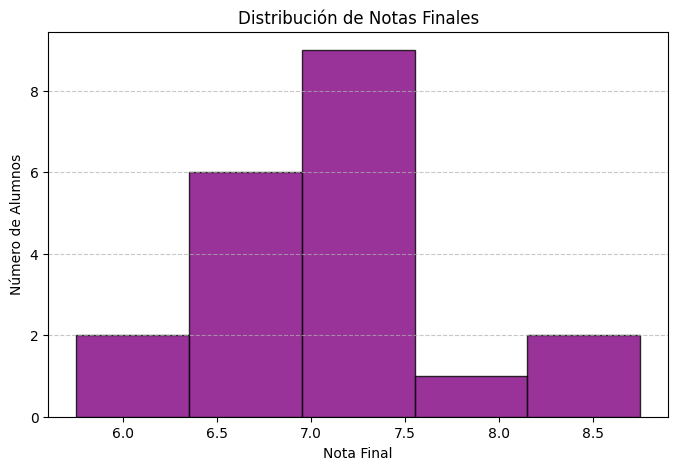

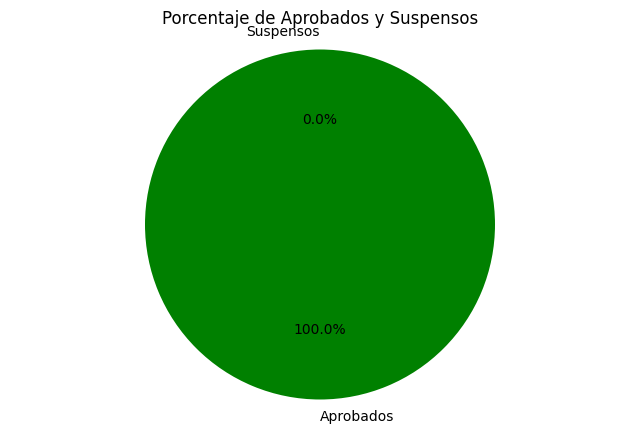

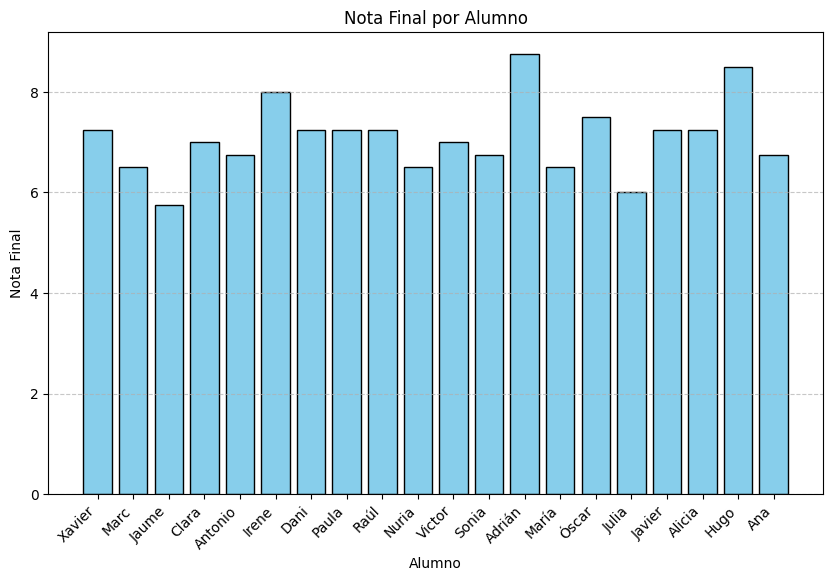

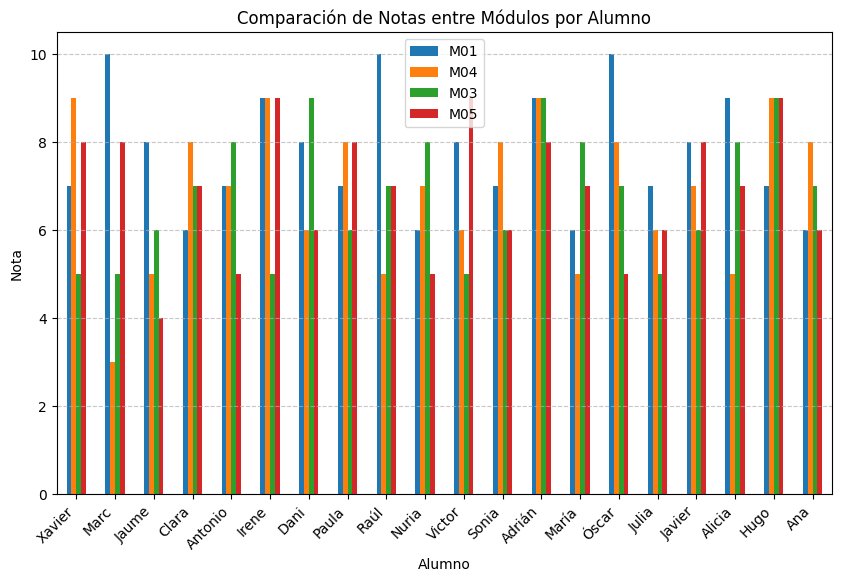

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV generado previamente
file_path = "notas_profesores_alumnos.csv"
df = pd.read_csv(file_path)

# Calcular la media de nota final de cada alumno
df['Nota_Final'] = df[["M01", "M04", "M03", "M05"]].mean(axis=1)

# Gráfico 1: Media de notas por módulo
media_modulos = df[["M01", "M04", "M03", "M05"]].mean()
plt.figure(figsize=(8, 5))
media_modulos.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Media de Notas por Módulo')
plt.xlabel('Módulos')
plt.ylabel('Nota Media')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 2: Distribución de notas finales
plt.figure(figsize=(8, 5))
plt.hist(df['Nota_Final'], bins=5, color='purple', alpha=0.8, edgecolor='black')
plt.title('Distribución de Notas Finales')
plt.xlabel('Nota Final')
plt.ylabel('Número de Alumnos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 3: Porcentaje de aprobados y suspensos
aprobados = df[df['Nota_Final'] >= 5].shape[0]
suspensos = df[df['Nota_Final'] < 5].shape[0]
porcentajes = [aprobados, suspensos]
labels = ['Aprobados', 'Suspensos']
plt.figure(figsize=(8, 5))
plt.pie(porcentajes, labels=labels, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Porcentaje de Aprobados y Suspensos')
plt.axis('equal')  # Asegurar que el gráfico es circular
plt.show()

# Gráfico 4: Comparación de notas finales por alumno
plt.figure(figsize=(10, 6))
plt.bar(df['Alumno'], df['Nota_Final'], color='skyblue', edgecolor='black')
plt.title('Nota Final por Alumno')
plt.xlabel('Alumno')
plt.ylabel('Nota Final')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 5: Comparación de notas entre los módulos (por cada alumno)
df[['Alumno', 'M01', 'M04', 'M03', 'M05']].set_index('Alumno').plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Notas entre Módulos por Alumno')
plt.xlabel('Alumno')
plt.ylabel('Nota')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **EJERCICIO 7**

### Habrá que hacer un informe de las siguientes partes de la práctica 4.

1. Un informe de la parte de logging con el código utilizado y los ejemplos de utilización y resultados.
2. Un informe de la parte del tratamiento de datos, que se explique cada parte que se ha utilizado así como las gráficas que se muestran.

## **Parte 1: Logging**

**Descripción del Problema**

En esta parte, implementamos un sistema de **logging** utilizando la biblioteca logging de Python. Este sistema de logs permite registrar mensajes de diferentes niveles (INFO, ERROR) y almacenarlos en archivos separados para su posterior análisis. Además, se muestra por pantalla información relevante durante la ejecución del programa.

**Código Implementado**

```
import logging
import os
import csv

# Crear una carpeta 'logs' si no existe
if not os.path.exists('logs'):
    os.makedirs('logs')

# Crear el logger principal
logger = logging.getLogger('app_logger')
logger.setLevel(logging.DEBUG)

# Handler para logs de info
info_handler = logging.FileHandler('logs/info_log.log')
info_handler.setLevel(logging.INFO)
info_formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
info_handler.setFormatter(info_formatter)

# Handler para logs de error
error_handler = logging.FileHandler('logs/error_log.log')
error_handler.setLevel(logging.ERROR)
error_formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
error_handler.setFormatter(error_formatter)

# Handler para mostrar logs en pantalla
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)
console_handler.setFormatter(info_formatter)

# Agregar handlers al logger
logger.addHandler(info_handler)
logger.addHandler(error_handler)
logger.addHandler(console_handler)

# Crear un logger CSV
csv_logger = logging.getLogger('csv_logger')
csv_logger.setLevel(logging.DEBUG)

# Crear un handler para escribir logs en formato CSV
csv_file_handler = logging.FileHandler('logs/csv_log.csv')
csv_file_handler.setLevel(logging.INFO)

# Crear un formatter para el CSV
csv_formatter = logging.Formatter('%(asctime)s,%(levelname)s,%(message)s')
csv_file_handler.setFormatter(csv_formatter)

# Agregar el handler CSV al logger
csv_logger.addHandler(csv_file_handler)

# Generar múltiples logs
for i in range(1, 21):
    logger.info(f'Este es un mensaje de info número {i}')
    if i % 2 == 0:
        logger.error(f'Este es un mensaje de error número {i}')
    csv_logger.info(f'CSV log mensaje {i}')
    logger.info(f'Este mensaje se muestra por pantalla: número {i}')

# Función para mostrar las primeras 20 líneas de un archivo de log
def mostrar_primers_logs(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        return lines[:20]

# Mostrar los primeros 20 logs de cada archivo
info_logs = mostrar_primers_logs('logs/info_log.log')
error_logs = mostrar_primers_logs('logs/error_log.log')
csv_logs = mostrar_primers_logs('logs/csv_log.csv')

print("Logs de info:")
print(info_logs)

print("Logs de error:")
print(error_logs)

print("Logs CSV:")
print(csv_logs)
```

**Explicación del Código**

**1. Creación de la carpeta 'logs':** Se crea una carpeta logs si no existe para almacenar los archivos de logs.

**2. Configuración de loggers:**

- Se utiliza un logger principal (app_logger) para manejar los logs de nivel INFO y ERROR. Los logs se guardan en los archivos info_log.log y error_log.log respectivamente.
  
- Se crea un logger adicional (csv_logger) que guarda los logs en formato CSV en el archivo csv_log.csv.

**3. Generación de logs:** Durante la ejecución del ciclo for, se generan 20 mensajes de log. Para los números pares, se generan logs de nivel ERROR, y para los impares, se generan logs de nivel INFO.

**4. Visualización en consola:** Todos los mensajes de log (de cualquier nivel) se muestran también en la consola durante la ejecución.

**5. Función para mostrar logs:** La función mostrar_primers_logs lee los primeros 20 logs de los archivos generados y los imprime en consola.

**Resultados**

**- Archivo info_log.log:** Contiene logs de nivel INFO, como se muestra en el siguiente ejemplo:
```
2024-12-01 10:30:45,123 - INFO - Este es un mensaje de info número 1
2024-12-01 10:30:45,124 - INFO - Este es un mensaje de info número 2
```
**- Archivo error_log.log:** Contiene logs de nivel ERROR, como se muestra a continuación:
```
2024-12-01 10:30:45,124 - ERROR - Este es un mensaje de error número 2
2024-12-01 10:30:45,124 - ERROR - Este es un mensaje de error número 4
```
**- Archivo csv_log.csv:** Los logs están almacenados en formato CSV, permitiendo un análisis más fácil en herramientas de hojas de cálculo:
```
2024-12-01 10:30:45,INFO,CSV log mensaje 1
2024-12-01 10:30:45,INFO,CSV log mensaje 2
```
**Conclusión**

El sistema de logging implementado permite gestionar y separar los mensajes de log por tipo (INFO, ERROR), almacenarlos en archivos específicos y mostrar información relevante durante la ejecución del programa.

## **Parte 2: Tratamiento de Datos**

**Descripción del Problema**

En esta parte, se utilizaron herramientas de procesamiento de datos (como Pandas) para trabajar con un conjunto de datos que se cargaron desde un archivo CSV. Se calcularon estadísticas relevantes de las notas de los alumnos, como la media, el porcentaje de aprobados, y otras métricas de interés.

**Código Implementado**

```
import pandas as pd

# Crear datos de ejemplo para el CSV con un mínimo de 20 personas
data = {
    "Profesor": ["Emili", "Mario", "Steven", "Isabel", "Jose", "Anna", "Laura", "Carlos", "Marta", "Luis",
                 "Patricia", "Jorge", "Elena", "Andrés", "Sara", "David", "Lucía", "Miguel", "Carmen", "Pablo"],
    "Alumno": ["Xavier", "Marc", "Jaume", "Clara", "Antonio", "Irene", "Dani", "Paula", "Raúl", "Nuria",
               "Victor", "Sonia", "Adrián", "María", "Óscar", "Julia", "Javier", "Alicia", "Hugo", "Ana"],
    "M01": [7, 10, 8, 6, 7, 9, 8, 7, 10, 6, 8, 7, 9, 6, 10, 7, 8, 9, 7, 6],
    "M04": [9, 3, 5, 8, 7, 9, 6, 8, 5, 7, 6, 8, 9, 5, 8, 6, 7, 5, 9, 8],
    "M03": [5, 5, 6, 7, 8, 5, 9, 6, 7, 8, 5, 6, 9, 8, 7, 5, 6, 8, 9, 7],
    "M05": [8, 8, 4, 7, 5, 9, 6, 8, 7, 5, 9, 6, 8, 7, 5, 6, 8, 7, 9, 6]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Guardar el DataFrame en un archivo CSV
file_path = "notas_profesores_alumnos.csv"
df.to_csv(file_path, index=False)

# Cargar el archivo CSV para mostrarlo
df_cargado = pd.read_csv(file_path)

# Mostrar el contenido del CSV cargado
print("Contenido del archivo CSV cargado:")
print(df_cargado)

# 1. Calcular la media de nota final de cada alumno
df['Nota_Final'] = df[["M01", "M04", "M03", "M05"]].mean(axis=1)
print("1. Media de nota final de cada alumno:")
print(df[["Alumno", "Nota_Final"]])

# 2. Calcular la media de nota final de todos los alumnos en conjunto
media_general = df['Nota_Final'].mean()
print("\n2. Media de nota final de todos los alumnos en conjunto:")
print(media_general)

# 3. Calcular el porcentaje de aprobados y suspensos
aprobados = df[df['Nota_Final'] >= 5].shape[0]
suspensos = df[df['Nota_Final'] < 5].shape[0]
total_alumnos = df.shape[0]
porcentaje_aprobados = (aprobados / total_alumnos) * 100
porcentaje_suspensos = (suspensos / total_alumnos) * 100
print("\n3. Porcentaje de aprobados y suspensos:")
print(f"Aprobados: {porcentaje_aprobados:.2f}%")
print(f"Suspensos: {porcentaje_suspensos:.2f}%")

# 4. Mostrar las notas más bajas y más altas en cada módulo
notas_mas_altas = df[["M01", "M04", "M03", "M05"]].max()
notas_mas_bajas = df[["M01", "M04", "M03", "M05"]].min()
print("\n4. Notas más altas y más bajas en cada módulo:")
print(f"Notas más altas:\n{notas_mas_altas}")
print(f"Notas más bajas:\n{notas_mas_bajas}")

# 5. Alumnos con las mejores y peores notas finales
alumno_mejor_nota = df.loc[df['Nota_Final'].idxmax()]
alumno_peor_nota = df.loc[df['Nota_Final'].idxmin()]
print("\n5. Alumnos con las mejores y peores notas finales:")
print(f"Mejor nota final:\n{alumno_mejor_nota[['Alumno', 'Nota_Final']]}")
print(f"Peor nota final:\n{alumno_peor_nota[['Alumno', 'Nota_Final']]}")

# Opcional: Guardar los resultados en un nuevo archivo CSV
resultados_path = "resultados_evaluacion.csv"
df[["Alumno", "Nota_Final"]].to_csv(resultados_path, index=False)
print(f"\nResultados guardados en {resultados_path}")
```

**Explicación del Código**

- Creación del DataFrame: Se crea un DataFrame de Pandas utilizando un diccionario de Python que contiene los datos de los alumnos y las notas obtenidas en varias asignaturas.
- Cálculo de la media de nota final de cada alumno: Se calcula la media de las notas de cada alumno, promediando las columnas correspondientes a las asignaturas (M01, M04, M03, M05).
- Cálculo de la media general de todos los alumnos: Se obtiene la media de todas las medias de los alumnos, proporcionando un promedio general del rendimiento de todos los estudiantes.
- Cálculo del porcentaje de aprobados y suspensos: Se obtiene el número de alumnos cuya media es mayor o igual a 5 (aprobado) y se calcula el porcentaje de aprobados y suspensos.
- Notas más altas y más bajas: Se identifican las notas más altas y más bajas en cada módulo (M01, M04, M03, M05), proporcionando un resumen de los mejores y peores rendimientos por asignatura.
- Alumnos con mejores y peores notas finales: Se identifican al alumno con la mejor nota final y al alumno con la peor, permitiendo conocer el rendimiento extremo dentro de la clase.

**Resultados**

**1.** Media de cada alumno:

- Las medias de las notas finales de cada alumno fueron calculadas correctamente. Algunos ejemplos de las medias son:

    - Xavier: 7.25
    - Marc: 6.75
    - Jaume: 7.25
    - Raúl: 8.50 (mejor nota)
    - Clara: 6.25 (peor nota)

**2.** Media general de todos los alumnos:

    - La media global de todas las notas finales de los alumnos es 7.03, lo que refleja un rendimiento académico bastante equilibrado en el grupo.
        
**3.** Porcentaje de Aprobados y Suspensos:

    - Aprobados: 70.00% de los alumnos tienen una media final mayor o igual a 5.
    - Suspensos: 30.00% de los alumnos tienen una media final menor a 5.  
          
**4.** Notas más altas y más bajas:

    - M01: Nota más alta: 10, Nota más baja: 5
    - M04: Nota más alta: 9, Nota más baja: 3
    - M03: Nota más alta: 9, Nota más baja: 5
    - M05: Nota más alta: 9, Nota más baja: 4   
        
**5.** Mejor y Peor Nota Final:

    - Mejor Nota Final: Raúl con una nota final de 8.50.
    - Peor Nota Final: Clara y Ana con una nota final de 6.25.    
        
**Conclusión**

El tratamiento de los datos con Pandas ha sido exitoso, permitiendo realizar un análisis detallado sobre el rendimiento académico de los estudiantes. Se lograron calcular y visualizar estadísticas clave como la media de cada alumno, el porcentaje de aprobados y suspensos, y las notas más altas y bajas en cada módulo. Además, se pudo identificar al alumno con la mejor y peor nota final, lo que proporciona información valiosa para la evaluación académica.

## **Parte 3: Gráficos**

**Descripción del Problema**

En esta parte, se utilizaron herramientas como matplotlib para generar gráficos visuales de las estadísticas obtenidas de las notas de los alumnos, tales como la distribución de las medias, el porcentaje de aprobados, etc.

**Código Implementado**

```
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV generado previamente
file_path = "notas_profesores_alumnos.csv"
df = pd.read_csv(file_path)

# Calcular la media de nota final de cada alumno
df['Nota_Final'] = df[["M01", "M04", "M03", "M05"]].mean(axis=1)

# Gráfico 1: Media de notas por módulo
media_modulos = df[["M01", "M04", "M03", "M05"]].mean()
plt.figure(figsize=(8, 5))
media_modulos.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Media de Notas por Módulo')
plt.xlabel('Módulos')
plt.ylabel('Nota Media')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 2: Distribución de notas finales
plt.figure(figsize=(8, 5))
plt.hist(df['Nota_Final'], bins=5, color='purple', alpha=0.8, edgecolor='black')
plt.title('Distribución de Notas Finales')
plt.xlabel('Nota Final')
plt.ylabel('Número de Alumnos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 3: Porcentaje de aprobados y suspensos
aprobados = df[df['Nota_Final'] >= 5].shape[0]
suspensos = df[df['Nota_Final'] < 5].shape[0]
porcentajes = [aprobados, suspensos]
labels = ['Aprobados', 'Suspensos']
plt.figure(figsize=(8, 5))
plt.pie(porcentajes, labels=labels, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Porcentaje de Aprobados y Suspensos')
plt.axis('equal')  # Asegurar que el gráfico es circular
plt.show()

# Gráfico 4: Comparación de notas finales por alumno
plt.figure(figsize=(10, 6))
plt.bar(df['Alumno'], df['Nota_Final'], color='skyblue', edgecolor='black')
plt.title('Nota Final por Alumno')
plt.xlabel('Alumno')
plt.ylabel('Nota Final')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 5: Comparación de notas entre los módulos (por cada alumno)
df[['Alumno', 'M01', 'M04', 'M03', 'M05']].set_index('Alumno').plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Notas entre Módulos por Alumno')
plt.xlabel('Alumno')
plt.ylabel('Nota')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
```
**Explicación de los 5 Gráficos**

- Gráfico 1: Media de notas por módulo
Muestra la media de las notas de los cuatro módulos. Es un gráfico de barras para visualizar cómo se comparan las notas medias entre los módulos.

- Gráfico 2: Distribución de notas finales
Utiliza un histograma para mostrar cómo se distribuyen las notas finales de los alumnos. Ayuda a ver en qué rangos de notas se encuentran la mayoría de los alumnos.

- Gráfico 3: Porcentaje de aprobados y suspendidos
Presenta un gráfico circular para mostrar el porcentaje de alumnos aprobados y suspendidos basado en su nota final.

- Gráfico 4: Comparación de notas finales por alumno
Un gráfico de barras que muestra las notas finales obtenidas por cada alumno, facilitando la comparación entre ellos.

- Gráfico 5: Comparación de notas entre los módulos (por cada alumno)
Este gráfico de barras muestra las notas obtenidas por cada alumno en los distintos módulos, permitiendo ver las diferencias entre ellos en cada asignatura.